In [39]:
import random
import numpy as np
import pandas
import matplotlib.pyplot as plt
from math import sqrt

# p = 500
# f = 50
# sf = 10
# r = 10

p = int(input("Number of demand points:"))
f = int(input("Number of candidate sites:"))
sf = int(input("Number of selected candidate sites:"))
r = int(input("Radius to cover:"))

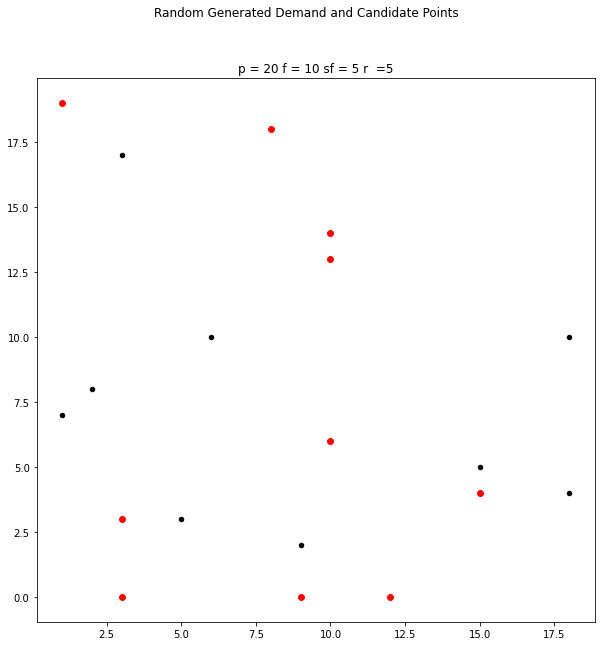

[3, 17] added to 1 19
[6, 10] added to 10 13
[15, 5] added to 15 4
[18, 4] added to 15 4
[15, 4] added to 15 4
[9, 2] added to 12 0
[5, 3] added to 9 0
[1, 7] added to 3 3
[[1, 19], [10, 13], [15, 4], [8, 18], [12, 0]]
[[3, 17], [6, 10], [15, 5], [18, 4], [15, 4], [9, 2], [5, 3], [1, 7]]


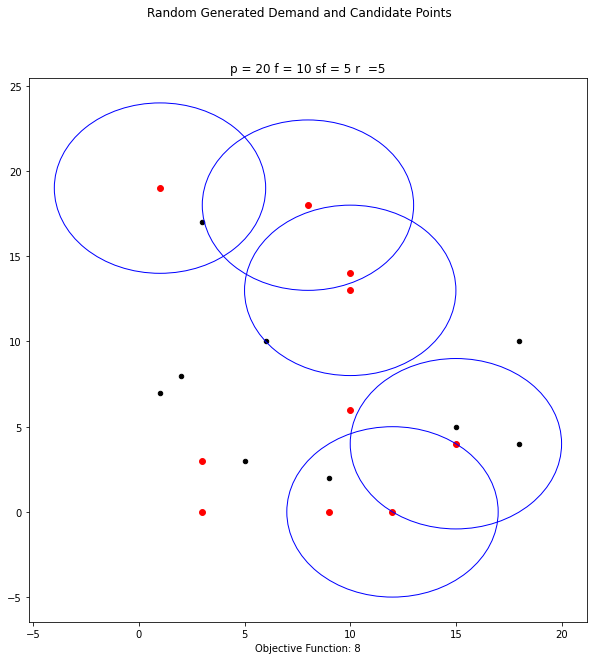

[[1, 19], [10, 13], [15, 4], [8, 18], [12, 0]]
8


In [40]:
# Demand Points
xg_points = np.random.randint(low=0, high=p, size=(p - f))
yg_points = np.random.randint(low=0, high=p, size=(p - f))
# Facility Points
xc_points = np.random.randint(low=0, high=p, size=f)
yc_points = np.random.randint(low=0, high=p, size=f)

title = "p = " + str(p) + " f = " + str(f) + " sf = " + str(sf) + " r  =" + str(r)
fig = plt.figure(figsize=(10,10))
plt.title(title)
plt.suptitle('Random Generated Demand and Candidate Points')
if p >= 100:
    ms = 1
else:
    ms = 20
plt.scatter(xg_points, yg_points, c='black', s=ms)
plt.scatter(xc_points, yc_points, c='red', s=ms + 15)
plt.savefig("firstg.jpg")
plt.show()

selected = []
covered = []
e_point = False
of = 0
for site in range(f):
    of = len(covered)
    if of <= p:
        c1 = True
    else:
        c1 = False
    if len(selected) < sf:
        c2 = True
    else:
        c2 = False
    for y in range(p - f):
        d = sqrt((xc_points[site] - xg_points[y]) ** 2 + (yc_points[site] - yg_points[y]) ** 2)
        # print('analizing: ' + str(xc_points[site]) + ',' + str(yc_points[site]) + ': ' + str(d))
        if d <= r:
            e_point = True
            if [xg_points[y], yg_points[y]] in covered:
                pass
            else:
                covered.append([xg_points[y], yg_points[y]])
                print([int(xg_points[y]), int(yg_points[y])], "added to", xc_points[site], yc_points[site])
    if c1 and c2 and e_point:
        selected.append([int(xc_points[site]), int(yc_points[site])])

xsf, ysf = zip(*selected)
print(selected)
print(covered)
# Figure with circles 
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
plt.title(title)
plt.suptitle('Random Generated Demand and Candidate Points')
plt.scatter(xg_points, yg_points, c='black', s=ms, label='Demand Points')
plt.scatter(xc_points, yc_points, c='red', s=ms + 15, label='Facility Points')
for i in range(len(selected)):
    x = xsf[i]
    y = ysf[i]
    circle = plt.Circle((x, y), r, color='blue', fill=False)
    ax.add_patch(circle)
# plt.scatter(xsf, ysf, marker='o', edgecolors='blue', facecolors="none", s=)
plt.xlabel('Objective Function: ' + str(of))
plt.savefig("secondg.jpg")
plt.show()
print(selected)
print(of)